<a href="https://colab.research.google.com/github/Krahjotdaan/MachineLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - Convolutional neural network(сверточная нейронная сеть)

# Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import Sequential

# Подготовка данных

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

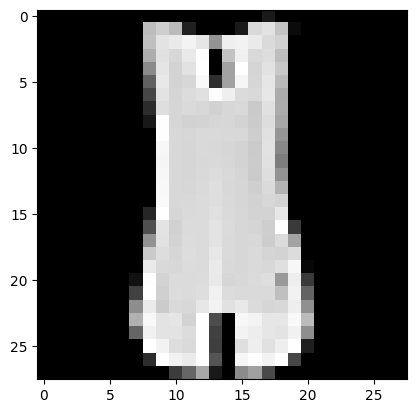

In [ ]:
plt.imshow(X_train[4], cmap='gray')
plt.show()

In [ ]:
X_train_mlp, X_test_mlp = X_train.reshape(60000, 784) / 255, X_test.reshape(10000, 784) / 255

X_train, X_test = X_train / 255, X_test / 255

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Базовая модель

In [ ]:
# mlp
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train_mlp, y=y_train, batch_size=64, epochs=7, validation_data=(X_test_mlp, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].plot(np.arange(7), history.history['accuracy'], label='train')
axes[0].plot(np.arange(7), history.history['val_accuracy'], label='test')
axes[0].set_title('accuracy')

axes[1].plot(np.arange(7), history.history['loss'], label='train')
axes[1].plot(np.arange(7), history.history['val_loss'], label='test')
axes[1].set_title('loss')

plt.legend()
plt.show()

In [ ]:
# cnn
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                200768    
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 201578 (787.41 KB)
Trainable params: 201578 (787.41 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
938/938 [==============================] - 8s 6ms/step - loss: 0.4498 - accuracy: 0.8436 - val_loss: 0.3588 - val_accuracy: 0.8726
Epoch 2/7
938/938 [==============================] - 4s 4ms/step - loss: 0.3025 - accuracy: 0.8916 - val_loss: 0.3032 - val_accuracy: 0.8916
Epoch 3/7
938/938 [==============================] - 4s 4ms/step - loss: 0.2617 - accuracy: 0.9064 - val_loss: 0.2828 - val_accuracy: 0.8948
Epoch 4/7
938/938 [==============================] - 5s 5ms/step - loss: 0.2343 - accuracy: 0.9147 - val_loss: 0.2711 - val_accuracy: 0.8982
Epoch 5/7
938/938 [==============================] - 4s 4ms/step - loss: 0.2116 - accuracy: 0.9226 - val_loss: 0.2666 - val_accuracy: 0.9031
Epoch 6/7
938/938 [==============================] - 4s 4ms/step - loss: 0.1959 - accuracy: 0.9286 - val_loss: 0.2509 - val_accuracy: 0.9107
Epoch 7/7
938/938 [==============================] - 5s 5ms/step - loss: 0.1797 - accuracy: 0.9338 - val_loss: 0.2587 - val_accuracy: 0.9080


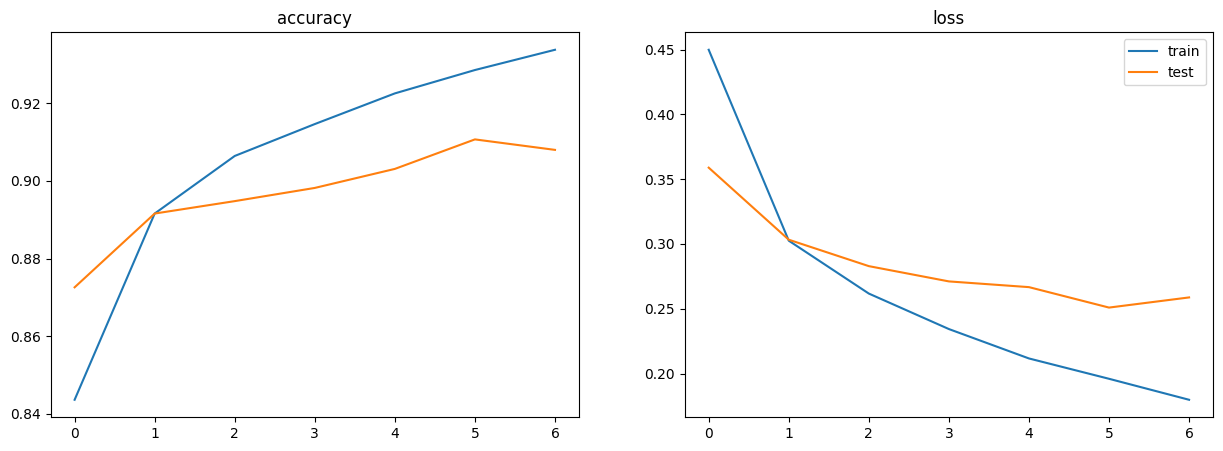

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].plot(np.arange(7), history.history['accuracy'], label='train')
axes[0].plot(np.arange(7), history.history['val_accuracy'], label='test')
axes[0].set_title('accuracy')

axes[1].plot(np.arange(7), history.history['loss'], label='train')
axes[1].plot(np.arange(7), history.history['val_loss'], label='test')
axes[1].set_title('loss')

plt.legend()
plt.show()

# Улучшаем базовую модель - добавляем блоки

In [ ]:
# vgg-like model
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                   

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
938/938 [==============================] - 9s 7ms/step - loss: 0.3429 - accuracy: 0.8738 - val_loss: 0.3044 - val_accuracy: 0.8886
Epoch 2/7
938/938 [==============================] - 6s 6ms/step - loss: 0.2672 - accuracy: 0.9012 - val_loss: 0.2791 - val_accuracy: 0.9010
Epoch 3/7
938/938 [==============================] - 6s 6ms/step - loss: 0.2264 - accuracy: 0.9156 - val_loss: 0.2484 - val_accuracy: 0.9094
Epoch 4/7
938/938 [==============================] - 6s 6ms/step - loss: 0.2021 - accuracy: 0.9245 - val_loss: 0.2449 - val_accuracy: 0.9110
Epoch 5/7
938/938 [==============================] - 5s 6ms/step - loss: 0.1806 - accuracy: 0.9328 - val_loss: 0.2340 - val_accuracy: 0.9151
Epoch 6/7
938/938 [==============================] - 6s 7ms/step - loss: 0.1618 - accuracy: 0.9385 - val_loss: 0.2197 - val_accuracy: 0.9239
Epoch 7/7
938/938 [==============================] - 5s 6ms/step - loss: 0.1477 - accuracy: 0.9445 - val_loss: 0.2395 - val_accuracy: 0.9179


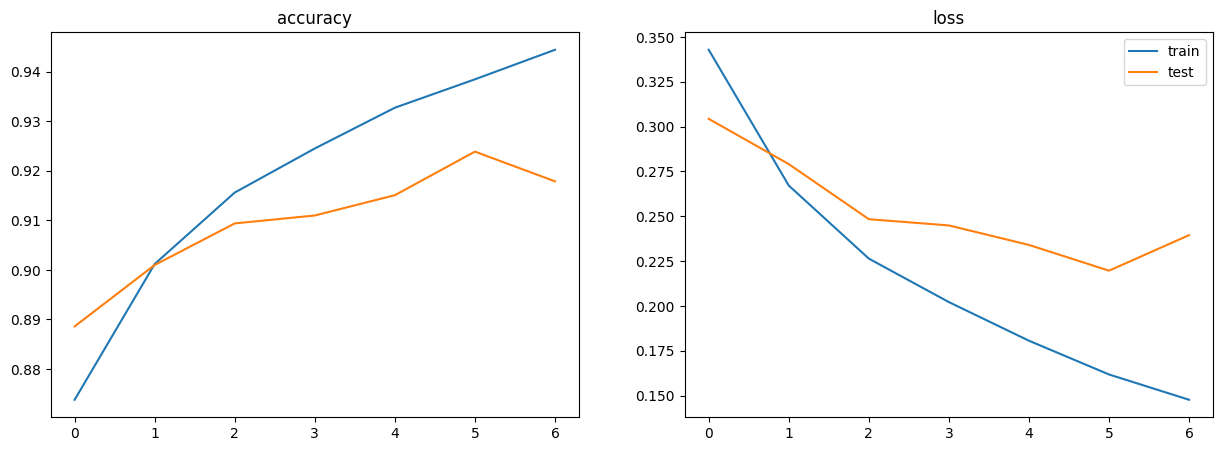

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='test')
axes[0].set_title('accuracy')

axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='test')
axes[1].set_title('loss')

plt.legend()
plt.show()

In [2]:
from keras.layers import BatchNormalization

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 14, 14, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 32)       

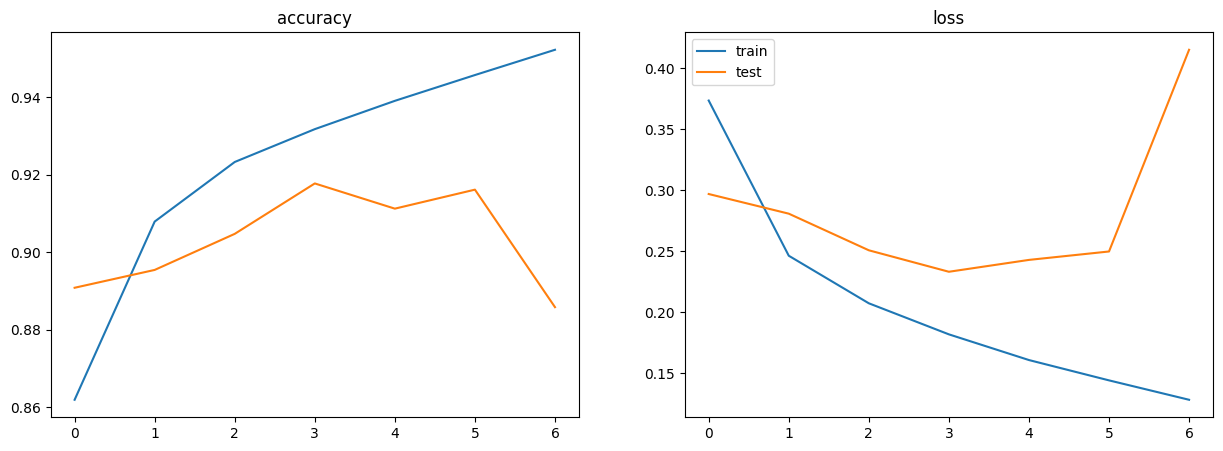

In [ ]:
# ускорение
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=7, validation_data=(X_test, y_test))

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='test')
axes[0].set_title('accuracy')

axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='test')
axes[1].set_title('loss')

plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)       

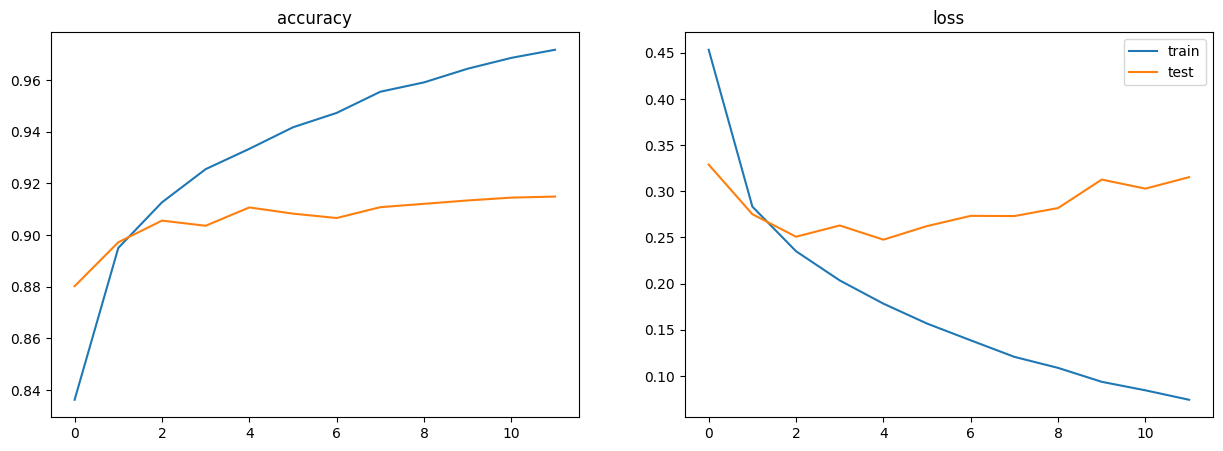

In [ ]:
# Борьба с переобучением
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=12, validation_data=(X_test, y_test))

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='test')
axes[0].set_title('accuracy')

axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='test')
axes[1].set_title('loss')

plt.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 14, 14, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)       

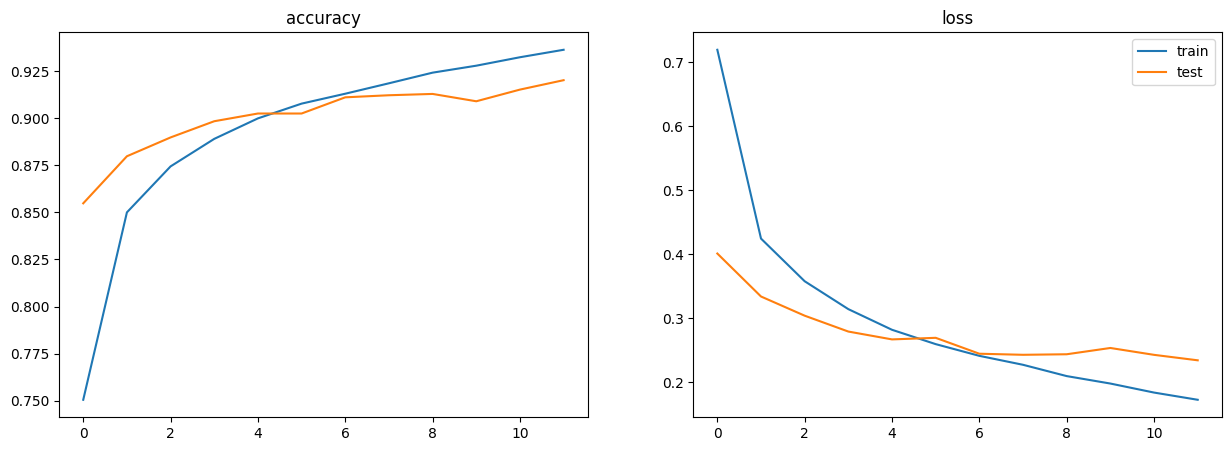

In [ ]:
# упрощение, больше штрафов
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(180, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(180, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=12, validation_data=(X_test, y_test))

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='test')
axes[0].set_title('accuracy')

axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='test')
axes[1].set_title('loss')

plt.legend()
plt.show()

# Визуализируем

In [ ]:
!pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.9 MB/s eta 0:00:00


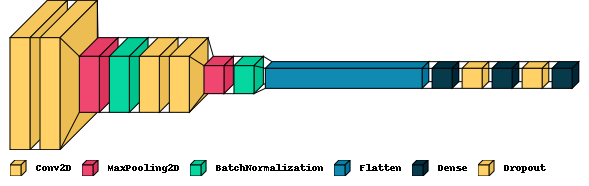

In [ ]:
visualkeras.layered_view(model, legend=True)

# Улучшаем блоки, добавляем  skip connection

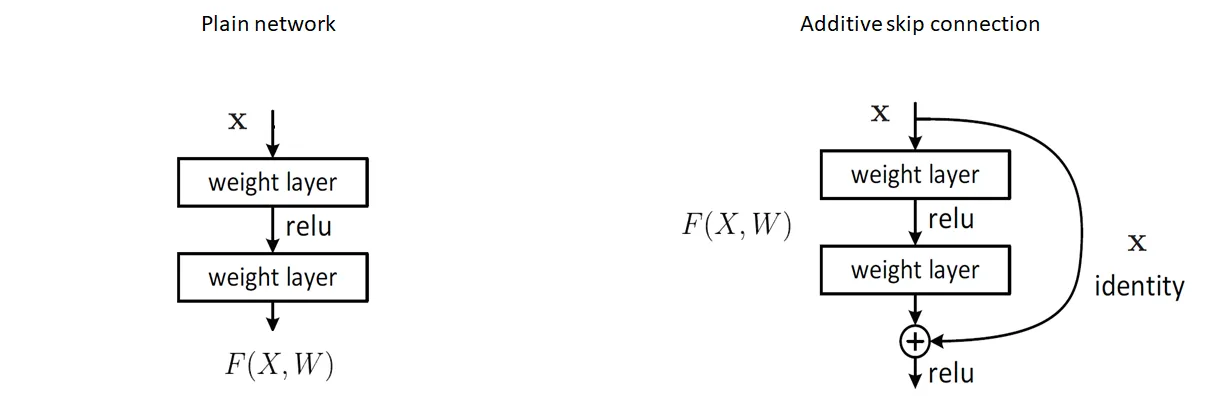

In [6]:
from keras.layers import Input, Concatenate, Activation, Add
from keras import Model

In [ ]:
inp = Input(shape=(28, 28, 1))
conv0 = Conv2D(8, (3, 3), padding='same')(inp)

conv1 = Conv2D(16, (3, 3), padding='same')(conv0)

conv1_1 = Conv2D(8, (3, 3), padding='same')(conv0)
act1_1 = Activation('relu')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), padding='same')(act1_1)
act1_2 = Activation('relu')(conv1_2)
conv1_3 = Conv2D(16, (3, 3), padding='same')(act1_2)
sum1 = Add()([conv1_3, conv1])
act1 = Activation('relu')(sum1)
p1 = MaxPooling2D(2, 2)(act1)

conv2 = Conv2D(32, (3, 3), padding='same')(p1)

conv2_1 = Conv2D(16, (3, 3), padding='same')(conv2)
act2_1 = Activation('relu')(conv2_1)
conv2_2 = Conv2D(16, (3, 3), padding='same')(act2_1)
act2_2 = Activation('relu')(conv2_2)
conv2_3 = Conv2D(32, (3, 3), padding='same')(act2_2)
sum2 = Add()([conv2_3, conv2])
act2 = Activation('relu')(sum2)
p2 = MaxPooling2D(2, 2)(act2)

conv3 = Conv2D(64, (3, 3), padding='same')(p2)

conv3_1 = Conv2D(32, (3, 3), padding='same')(conv3)
act3_1 = Activation('relu')(conv3_1)
conv3_2 = Conv2D(32, (3, 3), padding='same')(act3_1)
act3_2 = Activation('relu')(conv3_2)
conv3_3 = Conv2D(64, (3, 3), padding='same')(act3_2)
sum3 = Add()([conv3_3, conv3])
act3 = Activation('relu')(sum3)
p3 = MaxPooling2D(2, 2)(act3)

f = Flatten()(p3)
den1 = Dense(128, activation='relu')(f)
d1 = Dropout(0.35)(den1)
den2 = Dense(128, activation='relu')(d1)
d2 = Dropout(0.35)(den2)
out = Dense(10, activation='softmax')(d2)

model = Model(inputs=inp, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_21 (Conv2D)          (None, 28, 28, 8)            80        ['input_2[0][0]']             
                                                                                                  
 conv2d_23 (Conv2D)          (None, 28, 28, 8)            584       ['conv2d_21[0][0]']           
                                                                                                  
 activation_5 (Activation)   (None, 28, 28, 8)            0         ['conv2d_23[0][0]']           
                                                                                              

Epoch 1/12
938/938 [==============================] - 16s 12ms/step - loss: 1.0147 - accuracy: 0.6327 - val_loss: 0.5712 - val_accuracy: 0.7809
Epoch 2/12
938/938 [==============================] - 9s 10ms/step - loss: 0.5980 - accuracy: 0.7866 - val_loss: 0.4767 - val_accuracy: 0.8240
Epoch 3/12
938/938 [==============================] - 8s 9ms/step - loss: 0.4984 - accuracy: 0.8212 - val_loss: 0.4021 - val_accuracy: 0.8521
Epoch 4/12
938/938 [==============================] - 9s 10ms/step - loss: 0.4411 - accuracy: 0.8415 - val_loss: 0.3751 - val_accuracy: 0.8611
Epoch 5/12
938/938 [==============================] - 9s 10ms/step - loss: 0.4048 - accuracy: 0.8554 - val_loss: 0.3512 - val_accuracy: 0.8706
Epoch 6/12
938/938 [==============================] - 11s 11ms/step - loss: 0.3766 - accuracy: 0.8662 - val_loss: 0.3346 - val_accuracy: 0.8806
Epoch 7/12
938/938 [==============================] - 9s 9ms/step - loss: 0.3533 - accuracy: 0.8744 - val_loss: 0.3341 - val_accuracy: 0.8743

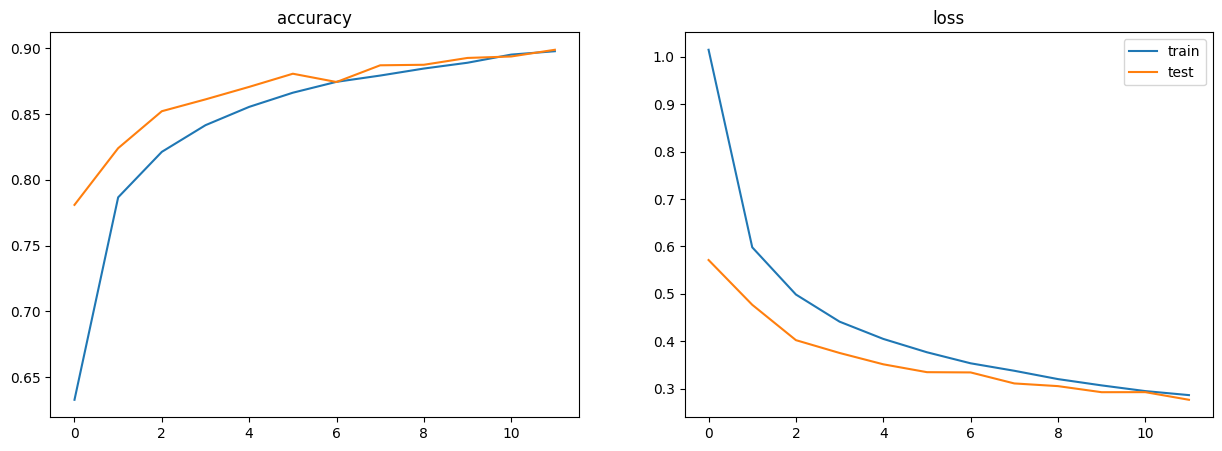

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=12, validation_data=(X_test, y_test))

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='test')
axes[0].set_title('accuracy')

axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='test')
axes[1].set_title('loss')

plt.legend()
plt.show()

# Задание
Используя сверточные нейронные сети, добейтесь наилучшего качества для набора данных cifar10. Набор данных содержит 10 классов

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

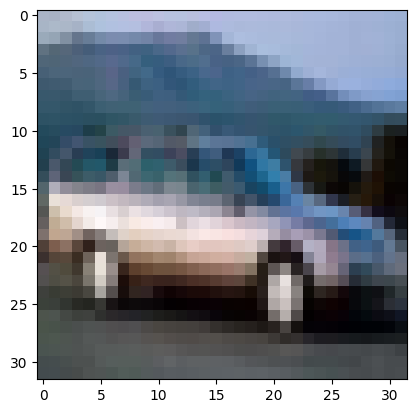

In [5]:
plt.imshow(X_train[4])
plt.show()

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential()

model.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='test')
axes[0].set_title('accuracy')

axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='test')
axes[1].set_title('loss')

plt.legend()
plt.show()